## Phase II Project Proposal
### What makes an NBA team successful?

#### Names: 
#### Madhav Nair
#### Nicholas Umansky
#### Raphael Sogueco

1. (1\%) Expresses the central motivation of the project and explains the (at least) two key questions to be explored. Gives a summary of the data processing pipeline so a technical expert can easily follow along.
2. (2\%) Obtains, cleans, and merges all data sources involved in the project.
3. (2\%) Builds at least two visualizations (graphs/plots) from the data which help to understand or answer the questions of interest. These visualizations will be graded based on how much information they can effectively communicate to readers. Please make sure your visualization are sufficiently distinct from each other.
   

### Context

The central motivation of the project is to determine whether certain player or team statistics can be used to determine a team's performance. We essentially want to know what parts of an NBA team make it successful in either having a winning record or winning the championship. The first question we wanted to explore is which specific performance metrics (such as points per game, rebounds, assists, etc.) are most strongly associated with a winning record? The second is can these statistics, alongside categorical factors like player position or team affiliation, be used to predict game outcomes or player performance trends? These questions can be very useful because they can offer valuable insights to coaches, analysts, and fans. The first question can inform team owners and game managers as to what type of players would bring success to their team, whether that is scorers, rebounders, or defensive players. The second question could be useful to understand the future of a team for a particular season. For dataframes including player statistics, we used the following data processing pipeline:
1. Make an API call querrying player statistics for a certain team during a certain season
2. Clean the data by only collecting each player's points, assists, and rebounds from the list of statistics
3. Calculate the average of each statistic
4. Put all the averages in the dataframe along with the player's name and id

For dataframes including team statistics, we used the following data processing pipeline:
1. Make an API call: Query the team statistics endpoint for a specified season (and stage) to retrieve each team's performance metrics.

2. Clean the data: Extract only the key performance metrics (e.g., points per game, rebounds per game, assists per game, field goal percentage, plus-minus, turnovers, blocks, and steals) from the API response.

3. Validate and format the data: Make sure the data is consistent by handling missing or zero values and converting data types if necessary.

4. Add categorical information: Append additional team details, such as team name, team ID, and division to the cleaned performance metrics.

5. Load and store the final data: Compile the processed statistics into a DataFrame and export it as a CSV file for  analysis.

# Player Averages from the Top 5 Teams with the Best Records

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://api-nba-v1.p.rapidapi.com/players/statistics"
headers = {
    "x-rapidapi-key": "fa660d5be7mshcf5c901c4fd3687p1ce7d1jsn118999c1f0fc",
    "x-rapidapi-host": "api-nba-v1.p.rapidapi.com"
}

def querry_player_stats(team_number, year):
    team_id = f"{team_number}"
    season = f"{year}"
    querystring = {"team":team_id,"season":season}
    response = requests.get(url, headers=headers, params=querystring).json()
    return response

In [2]:
def find_player_averages(data):
    df = pd.json_normalize(data['response'])
    for col in ['points', 'totReb', 'assists']: df[col] = pd.to_numeric(df[col], errors='coerce')
    player_avg = df.groupby( ['player.id', 'player.firstname', 'player.lastname'] )[['points', 'totReb', 'assists']].mean().reset_index()
    player_avg = player_avg.rename(columns={'player.id':'Player ID', 'player.firstname':'First Name', 'player.lastname': 'Last Name', 'points': 'Points', 'totReb': 'Rebounds', 'assists': 'Assists'})
    return player_avg

In [3]:
celtics_player_stats = querry_player_stats(2, 2024)
celtics_player_averages = find_player_averages(celtics_player_stats)
celtics_player_averages

,Player ID,First Name,Last Name,Points,Rebounds,Assists
0,75,Jaylen,Brown,22.062500,5.718750,4.484375
1,242,Jrue,Holiday,11.000000,4.163934,3.721311
2,248,Al,Horford,8.775862,5.982759,2.120690
3,432,Kristaps,Porzingis,19.435897,6.948718,2.076923
4,765,Torrey,Craig,3.153846,1.923077,0.307692
5,819,Luke,Kornet,5.873239,5.323944,1.619718
6,882,Jayson,Tatum,26.438356,8.561644,5.904110
7,897,Derrick,White,16.236842,4.342105,4.539474
8,1038,Lonnie,Walker IV,7.250000,1.500000,2.500000
9,2635,Payton,Pritchard,14.113924,3.772152,3.493671


In [4]:
thunder_player_stats = querry_player_stats(25, 2024)
thunder_player_averages = find_player_averages(thunder_player_stats)
thunder_player_averages

,Player ID,First Name,Last Name,Points,Rebounds,Assists
0,631,Alex,Caruso,6.654545,2.781818,2.490909
1,972,Shai,Gilgeous-Alexander,31.883117,4.909091,6.181818
2,978,Isaiah,Hartenstein,11.068966,10.603448,3.862069
3,1044,Kenrich,Williams,5.937500,3.406250,1.359375
4,2040,Luguentz,Dort,9.861111,4.166667,1.597222
5,2604,Isaiah,Joe,10.054054,2.621622,1.500000
6,2863,Aaron,Wiggins,11.360000,3.760000,1.720000
7,3432,Ousmane,Dieng,4.690476,2.690476,1.166667
8,3448,Chet,Holmgren,14.250000,7.937500,1.875000
9,3504,Jalen,Williams,20.828571,5.185714,5.014286


In [5]:
nuggets_player_stats = querry_player_stats(9, 2024)
nuggets_player_averages = find_player_averages(nuggets_player_stats)
nuggets_player_averages

,Player ID,First Name,Last Name,Points,Rebounds,Assists
0,195,Aaron,Gordon,13.820000,4.860000,3.200000
1,279,Nikola,Jokic,28.869565,12.550725,9.913043
2,286,DeAndre,Jordan,3.796296,5.185185,0.981481
3,383,Jamal,Murray,20.956522,3.695652,5.840580
4,468,Dario,Saric,4.571429,3.476190,1.571429
5,544,Russell,Westbrook,13.301370,4.917808,6.246575
6,1014,Michael,Porter Jr.,18.118421,6.842105,2.092105
7,1312,Vlatko,Cancar,2.444444,2.333333,0.944444
8,2627,Zeke,Nnaji,3.616667,1.716667,0.433333
9,3420,Christian,Braun,14.759494,5.113924,2.455696


In [6]:
timberwolves_player_stats = querry_player_stats(22, 2024)
timberwolves_player_averages = find_player_averages(timberwolves_player_stats)
timberwolves_player_averages

,Player ID,First Name,Last Name,Points,Rebounds,Assists
0,114,Mike,Conley,8.202899,2.463768,4.333333
1,192,Rudy,Gobert,11.171429,10.628571,1.728571
2,258,Joe,Ingles,1.173913,0.913043,1.478261
3,441,Julius,Randle,18.600000,6.953846,4.646154
4,770,P.J.,Dozier,1.538462,0.538462,0.692308
5,934,Keita,Bates-Diop,5.000000,2.500000,0.000000
6,962,Donte,DiVincenzo,11.475410,3.721311,3.737705
7,1845,Nickeil,Alexander-Walker,9.259259,3.135802,2.543210
8,2146,Naz,Reid,14.205128,5.910256,2.243590
9,2584,Anthony,Edwards,26.831169,5.597403,4.506494


In [7]:
clippers_player_stats = querry_player_stats(16, 2024)
clippers_player_averages = find_player_averages(clippers_player_stats)
clippers_player_averages

,Player ID,First Name,Last Name,Points,Rebounds,Assists
0,40,Nicolas,Batum,3.653846,2.807692,1.141026
1,152,Kris,Dunn,6.194444,3.444444,2.763889
2,216,James,Harden,21.987013,5.532468,8.480519
3,283,Derrick,Jones Jr.,10.093333,3.360000,0.760000
4,314,Kawhi,Leonard,20.750000,5.750000,3.031250
5,365,Patty,Mills,2.900000,0.000000,0.400000
6,434,Norman,Powell,21.610169,3.152542,2.118644
7,481,Ben,Simmons,3.571429,4.214286,3.428571
8,575,Ivica,Zubac,15.936709,12.101266,2.506329
9,743,Bogdan,Bogdanovic,11.750000,3.208333,3.208333


# Team Performance Metrics from NBA Franchises (2024 Season)

In [12]:
import requests
import pandas as pd
import time

base_url = "https://api-nba-v1.p.rapidapi.com"
headers = {
    "X-RapidAPI-Key": "fa660d5be7mshcf5c901c4fd3687p1ce7d1jsn118999c1f0fc",
    "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com"
}

def get_teams():
    """
    Retrieve all teams, their divisions, and NBA‑franchise status.

    Makes a GET request to the `/teams` endpoint and parses the JSON response
    into three dictionaries.

    Returns:
        teams (dict[int, str]):
            Mapping from team ID to team name.
        divisions (dict[int, str | None]):
            Mapping from team ID to its division (or None).
        franchises (dict[int, bool]):
            Mapping from team ID to its nbaFranchise flag.
    """
    url = f"{base_url}/teams"
    resp = requests.get(url, headers=headers).json()

    teams = {}
    divisions = {}
    franchises = {}
    for team in resp["response"]:
        tid = team["id"]
        teams[tid] = team["name"]
        divisions[tid] = (
            team.get("leagues", {})
                .get("standard", {})
                .get("division")
        )
        franchises[tid] = team.get("nbaFranchise", False)
    return teams, divisions, franchises

def get_team_stats(team_id, season="2024", stage=1):
    """
    Fetch per-game statistics for a given NBA team in a specified season.

    Args:
        team_id (int):         The unique NBA team identifier.
        season (str, optional): The season year (e.g. "2024"). Defaults to "2024".
        stage (int, optional):  The stage of the season (e.g. 1 for regular season). Defaults to 1.

    Returns:
        dict[str, int | float]:
            A dict containing:
            - "Team ID": the team_id passed in
            - "Points": total points
            - "Rebounds": total rebounds
            - "Field Goal Percentage": shooting percentage
            - "Assists": assists
            - "Plus-Minus": plus-minus
            - "Turnovers": turnovers
            - "Blocks": blocks
            - "Steals": steals
    """
    url = f"{base_url}/teams/statistics"
    params = {"id": team_id, "season": season, "stage": stage}
    stats = requests.get(url, headers=headers, params=params).json()["response"][0]
    return {
        "Team ID": team_id,
        "Points": stats.get("points", 0),
        "Rebounds": stats.get("totReb", 0),
        "Field Goal Percentage": stats.get("fgp", 0),
        "Assists": stats.get("assists", 0),
        "Plus-Minus": stats.get("plusMinus", 0),
        "Turnovers": stats.get("turnovers", 0),
        "Blocks": stats.get("blocks", 0),
        "Steals": stats.get("steals", 0),
    }

def main():
    """
    Main data collection pipeline.

    1. Retrieves team metadata (names, divisions, franchise flags).
    2. Iterates through teams with ID ≤ 41, prompting before each fetch.
    3. Pauses 1 second between requests to respect API rate limits.
    4. Compiles results into a DataFrame.
    5. Keeps only teams where nbaFranchise is False.
    6. Exports the cleaned DataFrame to CSV.
    """
    team_names, team_divisions, team_franchises = get_teams()

    records = []
    for tid in sorted(team_names.keys()):
        if tid > 41:
            break
        name = team_names[tid]
        input(f"\nPress Enter to fetch stats for {name} (ID: {tid})…")
        stats = get_team_stats(tid, season="2024")
        stats["Team Name"]     = name
        stats["Division"]      = team_divisions[tid]
        stats["nbaFranchise"]  = team_franchises[tid]
        records.append(stats)
        time.sleep(1)

    df = pd.DataFrame(records)

    # Keep only the teams with nbaFranchise == False
    df = df[df["nbaFranchise"] == True]

    # Save to CSV
    df.to_csv("nba_team_stats_2024_v3.csv", index=False)
    print(df.head())
    print(df.tail())

# Run the pipeline
main()


Press Enter to fetch stats for Atlanta Hawks (ID: 1)…

Press Enter to fetch stats for Boston Celtics (ID: 2)…

Press Enter to fetch stats for Brisbane Bullets (ID: 3)…

Press Enter to fetch stats for Brooklyn Nets (ID: 4)…

Press Enter to fetch stats for Charlotte Hornets (ID: 5)…

Press Enter to fetch stats for Chicago Bulls (ID: 6)…

Press Enter to fetch stats for Cleveland Cavaliers (ID: 7)…

Press Enter to fetch stats for Dallas Mavericks (ID: 8)…

Press Enter to fetch stats for Denver Nuggets (ID: 9)…

Press Enter to fetch stats for Detroit Pistons (ID: 10)…

Press Enter to fetch stats for Golden State Warriors (ID: 11)…

Press Enter to fetch stats for Guangzhou Long-Lions (ID: 12)…

Press Enter to fetch stats for Haifa Maccabi Haifa (ID: 13)…

Press Enter to fetch stats for Houston Rockets (ID: 14)…

Press Enter to fetch stats for Indiana Pacers (ID: 15)…

Press Enter to fetch stats for LA Clippers (ID: 16)…

Press Enter to fetch stats for Los Angeles Lakers (ID: 17)…

Press Ent

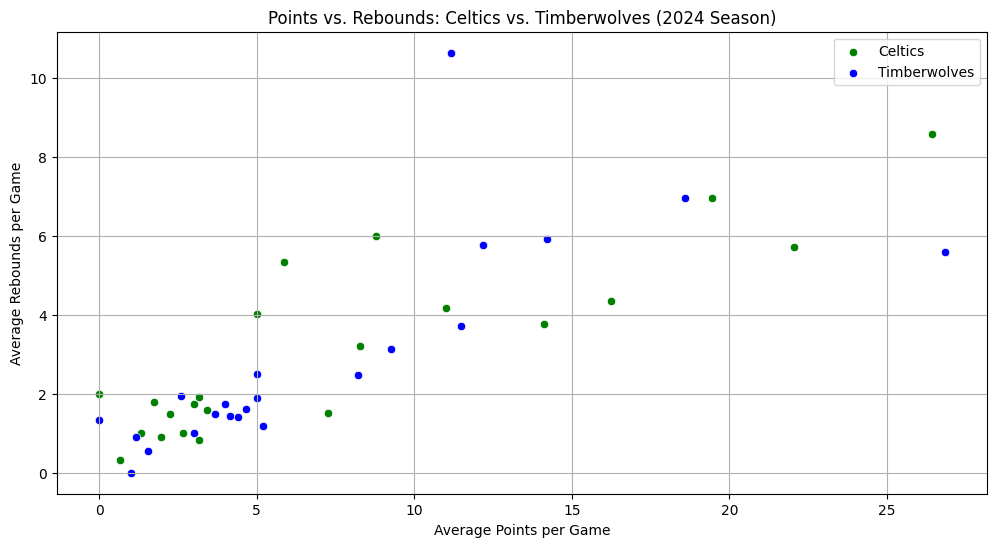

In [9]:
plt.figure(figsize=(12, 6))

# Celtics plot
sns.scatterplot(data=celtics_player_averages, x='Points', y='Rebounds', color='green', label='Celtics')

# Timberwolves plot
sns.scatterplot(data=timberwolves_player_averages, x='Points', y='Rebounds', color='blue', label='Timberwolves')

plt.title('Points vs. Rebounds: Celtics vs. Timberwolves (2024 Season)')
plt.xlabel('Average Points per Game')
plt.ylabel('Average Rebounds per Game')
plt.legend()
plt.grid(True)
plt.show()

#### Points Vs. Rebounds Plot

In [15]:
plt.figure(figsize=(12, 6))

# Celtics plot
sns.scatterplot(data=celtics_player_averages, x='Points', y='Assists', color='green', label='Celtics')

# Timberwolves plot
sns.scatterplot(data=timberwolves_player_averages, x='Points', y='Assists', color='blue', label='Timberwolves')

plt.title('Points vs. Assists: Celtics vs. Timberwolves (2024 Season)')
plt.xlabel('Average Points per Game')
plt.ylabel('Average Assists per Game')
plt.legend()
plt.grid(True)
plt.show()

#### Points vs. Assists

NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>

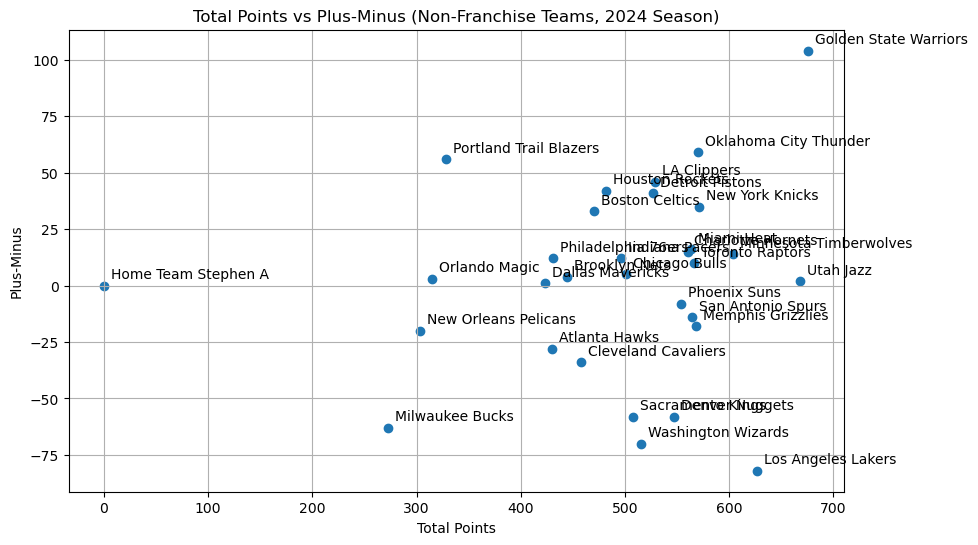

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('nba_team_stats_2024_v3.csv')
x = df['Points per Game']
y = df['Plus-Minus']
names = df['Team Name']

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
for i, team in enumerate(names):
    plt.annotate(team, (x[i], y[i]), textcoords="offset points", xytext=(5, 5), ha='left')

plt.title('Total Points vs Plus-Minus (Non-Franchise Teams, 2024 Season)')
plt.xlabel('Total Points')
plt.ylabel('Plus-Minus')
plt.grid(True)
plt.show()

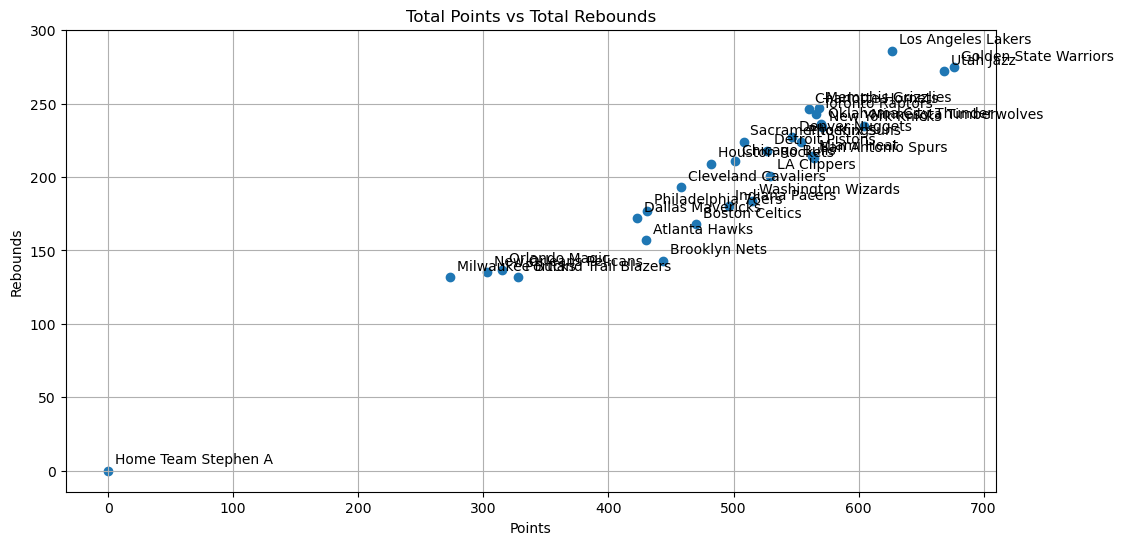

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('nba_team_stats_2024_v3.csv')

plt.figure(figsize=(12, 6))
plt.scatter(df['Points per Game'], df['Rebounds per Game'])
for i, team in enumerate(df['Team Name']):
    plt.annotate(team, 
                 (df['Points per Game'].iloc[i], df['Rebounds per Game'].iloc[i]), 
                 textcoords="offset points", xytext=(5, 5), ha='left')

plt.title('Total Points vs Total Rebounds')
plt.xlabel('Points')
plt.ylabel('Rebounds')
plt.grid(True)
plt.show()